<a href="https://colab.research.google.com/github/Agung-N-Pangestu/PSDS-6.0/blob/main/2200015037_Agung_N_Pangestu_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Copyright 2017 Google LLC.

In [1]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Pengantar Singkat tentang pandas

**Tujuan Pembelajaran:**
  * Memperoleh pengantar tentang struktur data `DataFrame` dan `Series` dari library *pandas*
  * Mengakses dan memanipulasi data dalam `DataFrame` dan `Series`
  * Mengimpor data CSV ke dalam `DataFrame` *pandas*
  * Mengindeks ulang `DataFrame` untuk mengacak data

[*pandas*](http://pandas.pydata.org/) adalah API analisis data yang berorientasi pada kolom. API ini merupakan fitur yang canggih untuk menangani dan menganalisis data masukan, dan banyak framework ML mendukung struktur data *pandas* sebagai masukan.
Meskipun pengantar yang komprehensif mengenai *pandas* API memerlukan penjabaran yang panjang, konsep intinya cukup mudah, dan kita akan mempresentasikannya di bawah. Untuk mengetahui referensi yang lebih lengkap, kunjungi [situs dokumen *pandas*](http://pandas.pydata.org/pandas-docs/stable/index.html) yang berisi dokumentasi ekstensif dan berbagai tutorial.

## Konsep Dasar

Baris berikut ini mengimpor *pandas* API dan mencetak versi API tersebut:

In [2]:
from __future__ import print_function

import pandas as pd
pd.__version__

'1.5.3'

Struktur data utama di *pandas* diterapkan sebagai dua kelas:

  * **`DataFrame`**, yang dapat Anda bayangkan sebagai tabel data relasional, dengan baris dan kolom yang diberi nama.
  * **`Series`**, yang merupakan kolom tunggal. `DataFrame` berisi satu atau beberapa `Series` dan sebuah nama untuk tiap `Series`.

Frame data adalah abstraksi yang umum digunakan untuk manipulasi data. Penerapan yang serupa ada di [Spark](https://spark.apache.org/) dan [R](https://www.r-project.org/about.html).

Salah satu cara untuk membuat `Series` adalah dengan membangun objek `Series`. Sebagai contoh:

In [3]:
pd.Series(['San Francisco', 'San Jose', 'Sacramento'])

0    San Francisco
1         San Jose
2       Sacramento
dtype: object

Objek `DataFrame` dapat dibuat dengan meneruskan `dict` yang memetakan nama kolom `string` ke masing-masing `Series`. Jika panjang `Series` tidak sesuai, nilai yang hilang akan diisi dengan nilai [NA/NaN](http://pandas.pydata.org/pandas-docs/stable/missing_data.html) khusus. Misalnya:

In [4]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])

pd.DataFrame({ 'City name': city_names, 'Population': population })

,City name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


Namun, Anda biasanya perlu memuat seluruh file ke dalam `DataFrame`. Contoh berikut berisi pemuatan file yang berisi data perumahan California. Jalankan sel berikut untuk memuat data dan membuat definisi fitur:

In [5]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Contoh di atas menggunakan `DataFrame.describe` untuk menampilkan statistik yang menarik tentang `DataFrame`. Fungsi yang berguna lainnya adalah `DataFrame.head`, yang menampilkan beberapa data pertama dari `DataFrame`:

In [6]:
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


Fitur canggih lainnya dari *pandas* adalah grafik. Misalnya, `DataFrame.hist` memungkinkan Anda belajar distribusi nilai dalam kolom dengan cepat:

array([[<Axes: title={'center': 'housing_median_age'}>]], dtype=object)

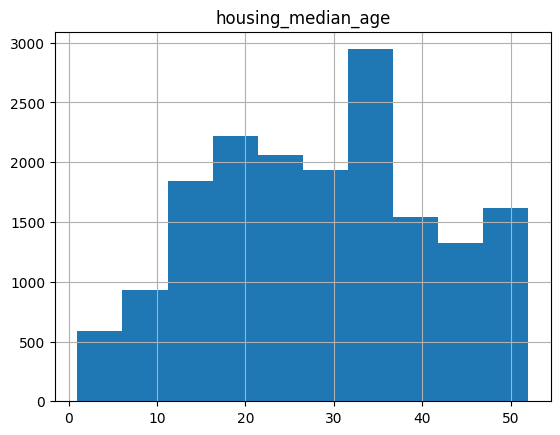

In [7]:
california_housing_dataframe.hist('housing_median_age')

## Mengakses Data

Anda dapat mengakses data `DataFrame` menggunakan operasi daftar/kamus Python yang dikenal:

In [8]:
cities = pd.DataFrame({ 'City name': city_names, 'Population': population })
print(type(cities['City name']))
cities['City name']

<class 'pandas.core.series.Series'>


0    San Francisco
1         San Jose
2       Sacramento
Name: City name, dtype: object

In [9]:
print(type(cities['City name'][1]))
cities['City name'][1]

<class 'str'>


'San Jose'

In [10]:
print(type(cities[0:2]))
cities[0:2]

<class 'pandas.core.frame.DataFrame'>


,City name,Population
0,San Francisco,852469
1,San Jose,1015785


Selain itu, *pandas* menyediakan API yang sangat kaya untuk [pemilihan dan pengindeksan](http://pandas.pydata.org/pandas-docs/stable/indexing.html) tingkat lanjut yang terlalu ekstensif untuk dibahas di sini.

## Memanipulasi Data

Anda dapat menerapkan operasi aritmetika dasar Python ke `Series`. Misalnya:

In [11]:
population / 1000.

0     852.469
1    1015.785
2     485.199
dtype: float64

[NumPy](http://www.numpy.org/) adalah toolkit populer untuk penghitungan ilmiah. `Series` *pandas* dapat digunakan sebagai argumen untuk sebagian besar fungsi NumPy:

In [12]:
import numpy as np

np.log(population)

0    13.655892
1    13.831172
2    13.092314
dtype: float64

Untuk transformasi kolom tunggal yang lebih kompleks, Anda dapat menggunakan `Series.apply`. Seperti [fungsi pemetaan](https://docs.python.org/2/library/functions.html#map) Python,
`Series.apply` menerima [fungsi lambda](https://docs.python.org/2/tutorial/controlflow.html#lambda-expressions) sebagai argumen, yang diterapkan ke tiap nilai.

Contoh di bawah berisi pembuatan `Series` baru yang menunjukkan apakah `population` berjumlah di atas satu juta:

In [13]:
population.apply(lambda val: val > 1000000)

0    False
1     True
2    False
dtype: bool


Mengubah `DataFrames` juga mudah. Misalnya, kode berikut menambahkan dua `Series` ke `DataFrame` yang sudah ada:

In [14]:
cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities['Population density'] = cities['Population'] / cities['Area square miles']
cities

,City name,Population,Area square miles,Population density
0,San Francisco,852469,46.87,18187.945381
1,San Jose,1015785,176.53,5754.177760
2,Sacramento,485199,97.92,4955.055147


## Latihan #1

Ubah tabel `cities` dengan menambahkan kolom boolean baru yang bernilai BENAR, jika dan hanya jika *kedua* hal berikut bernilai BENAR:

  * Kota memiliki nama yang berawalan saint (santo).
  * Luas kota lebih besar dari 50 mil persegi.

**Catatan:** `Series` boolean digabungkan menggunakan operator bitwise, bukan boolean tradisional. Misalnya, saat menjalankan *logical and*, gunakan `&` bukan `and`.

**Petunjuk:** "San" dalam bahasa Spanyol berarti "santo".

### Solusi

Klik di bawah untuk mendapatkan solusi.

In [15]:
cities['Is wide and has saint name'] = (cities['Area square miles'] > 50) & cities['City name'].apply(lambda name: name.startswith('San'))
cities

,City name,Population,Area square miles,Population density,Is wide and has saint name
0,San Francisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True
2,Sacramento,485199,97.92,4955.055147,False


## Indeks
Objek `Series` dan `DataFrame` juga menentukan properti `index` yang menetapkan nilai ID ke setiap item `Series` atau baris `DataFrame`.

Secara default, saat melakukan konstruksi, *pandas* menetapkan nilai indeks yang mencerminkan pengurutan data sumber. Setelah dibuat, nilai indeks bersifat stabil; artinya, nilai tersebut tidak berubah saat data diurutkan kembali.

In [16]:
city_names.index

RangeIndex(start=0, stop=3, step=1)

In [17]:
cities.index

RangeIndex(start=0, stop=3, step=1)

Panggil `DataFrame.reindex` untuk mengurutkan kembali baris secara manual. Misalnya, berikut ini memiliki efek yang sama seperti mengurutkan berdasarkan nama kota:

In [18]:
cities.reindex([2, 0, 1])

,City name,Population,Area square miles,Population density,Is wide and has saint name
2,Sacramento,485199,97.92,4955.055147,False
0,San Francisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True


Pengindeksan ulang adalah cara yang tepat untuk mengacak `DataFrame`. Pada contoh di bawah, kita mengambil indeks, yang menyerupai array, dan meneruskannya ke fungsi `random.permutation` NumPy, yang akan mengacak nilainya. Memanggil `reindex` dengan array yang diacak ini akan membuat baris `DataFrame` teracak dengan cara yang sama.
Coba jalankan sel berikut beberapa kali.

In [19]:
cities.reindex(np.random.permutation(cities.index))

,City name,Population,Area square miles,Population density,Is wide and has saint name
0,San Francisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True
2,Sacramento,485199,97.92,4955.055147,False


Untuk mengetahui informasi selengkapnya, lihat [dokumentasi Indeks](http://pandas.pydata.org/pandas-docs/stable/indexing.html#index-objects).

## Latihan #2

Metode `reindex` mengizinkan nilai indeks yang tidak ada di nilai indeks `DataFrame`' asli. Cobalah dan lihat apa yang terjadi jika Anda menggunakan nilai tersebut. Menurut Anda, mengapa metode ini diizinkan?

### Solusi

Klik di bawah ini untuk mendapatkan solusi.

Jika array masukan `reindex` Anda mencakup nilai yang tidak ada di nilai indeks `DataFrame` asli, `reindex` akan menambahkan baris baru untuk indeks yang "hilang" tersebut, dan mengisi semua kolom terkait dengan nilai `NaN`:

In [20]:
cities.reindex([0, 4, 5, 2])

,City name,Population,Area square miles,Population density,Is wide and has saint name
0,San Francisco,852469.0,46.87,18187.945381,False
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
2,Sacramento,485199.0,97.92,4955.055147,False


Perilaku ini disukai karena indeks sering kali berupa string yang diambil dari data yang sebenarnya (lihat [dokumentasi pengindeksan ulang *pandas*](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reindex.html) untuk mengetahui contoh nilai indeks yang merupakan nama browser).

Dalam kasus ini, pengindeksan ulang akan lebih mudah dilakukan jika indeks yang "hilang" diizinkan menggunakan daftar eksternal, karena Anda tidak perlu khawatir mengenai pembersihan masukan.